# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

/home/toto/anaconda3/envs/tequila/lib/python3.7/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('beh2', bond_lengths, basis, method='fci')

converged SCF energy = -5.20764371334677
E = -5.261609469860386 Eh
converged SCF energy = -12.0151700923054
E = -12.06495610019475 Eh
converged SCF energy = -13.9952479148013
E = -14.034234080231748 Eh
converged SCF energy = -14.8936505810723
E = -14.922607626809516 Eh
converged SCF energy = -15.3162702430393
E = -15.341694790934923 Eh
converged SCF energy = -15.498619288999
E = -15.525137640787335 Eh
converged SCF energy = -15.557846349987
E = -15.588656740341191 Eh
converged SCF energy = -15.5524598103709
E = -15.590400228138503 Eh
converged SCF energy = -15.5127637078718
E = -15.560917803418517 Eh
converged SCF energy = -15.4550960271233
E = -15.517116536391038 Eh
converged SCF energy = -15.3888479081095
E = -15.469136621394696 Eh
converged SCF energy = -15.3198547118837
E = -15.423696408149311 Eh
converged SCF energy = -15.2520144790746
E = -15.385733134519185 Eh
converged SCF energy = -15.1880720378971
E = -15.358946505915146 Eh
converged SCF energy = -15.129993302793
E = -15.3443

In [4]:
#Run HF
HF_PES = obtain_PES('beh2', bond_lengths, basis,  method='hf')

converged SCF energy = -5.20764371334677
E = -5.20764371334678 Eh
converged SCF energy = -12.0151700923054
E = -12.015170092305375 Eh
converged SCF energy = -13.9952479148013
E = -13.99524791480132 Eh
converged SCF energy = -14.8936505810723
E = -14.893650581072285 Eh
converged SCF energy = -15.3162702430393
E = -15.316270243039359 Eh
converged SCF energy = -15.498619288999
E = -15.498619288999011 Eh
converged SCF energy = -15.557846349987
E = -15.557846349987027 Eh
converged SCF energy = -15.5524598103709
E = -15.552459810370975 Eh
converged SCF energy = -15.5127637078718
E = -15.512763707871839 Eh
converged SCF energy = -15.4550960271233
E = -15.4550960271233 Eh
converged SCF energy = -15.3888479081095
E = -15.388847908109456 Eh
converged SCF energy = -15.3198547118837
E = -15.319854711883739 Eh
converged SCF energy = -15.2520144790746
E = -15.252014479074571 Eh
converged SCF energy = -15.1880720378971
E = -15.188072037897154 Eh
converged SCF energy = -15.129993302793
E = -15.1299933

In [5]:
#Run CCSD
CCSD_PES = obtain_PES('beh2', bond_lengths, basis,  method='ccsd')

converged SCF energy = -5.20764371334677
E = -5.261303944776371 Eh
converged SCF energy = -12.0151700923054
E = -12.064421513704977 Eh
converged SCF energy = -13.9952479148013
E = -14.033707869163262 Eh
converged SCF energy = -14.8936505810723
E = -14.92224171076628 Eh
converged SCF energy = -15.3162702430393
E = -15.34141342551652 Eh
converged SCF energy = -15.498619288999
E = -15.524868671455962 Eh
converged SCF energy = -15.557846349987
E = -15.58833799984659 Eh
converged SCF energy = -15.5524598103709
E = -15.589953807634497 Eh
converged SCF energy = -15.5127637078718
E = -15.560217317189803 Eh
converged SCF energy = -15.4550960271233
E = -15.515930189952504 Eh
converged SCF energy = -15.3888479081095
E = -15.467032318499287 Eh
converged SCF energy = -15.3198547118837
E = -15.419943522281695 Eh
converged SCF energy = -15.2520144790746
E = -15.379531957208702 Eh
converged SCF energy = -15.1880720378971
E = -15.35100546893823 Eh
converged SCF energy = -15.129993302793
E = -15.3377466

In [6]:
bond_lengths

array([0.2       , 0.37142857, 0.54285714, 0.71428571, 0.88571429,
       1.05714286, 1.22857143, 1.4       , 1.57142857, 1.74285714,
       1.91428571, 2.08571429, 2.25714286, 2.42857143, 2.6       ])

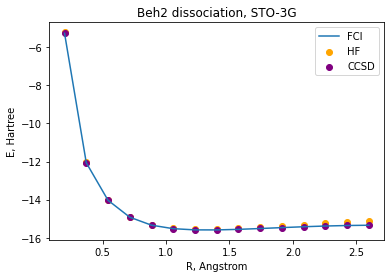

In [7]:
#Plot H2 PESs

plt.title('Beh2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [8]:
bond_lengths = np.linspace(0.5,2.7,15)

In [9]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

converged SCF energy = -73.1294523897688
E = -73.14266064419186 Eh
converged SCF energy = -74.4533755394604
E = -74.4751075124485 Eh
converged SCF energy = -74.870474914869
E = -74.90403466185086 Eh
converged SCF energy = -74.9629980695871
E = -75.01375475283753 Eh
converged SCF energy = -74.9280772606054
E = -75.00350455957073 Eh
converged SCF energy = -74.8427106360511
E = -74.95165998270585 Eh
converged SCF energy = -74.7404009823898
E = -74.89214773895245 Eh
converged SCF energy = -74.635639705213
E = -74.83920106144603 Eh
converged SCF energy = -74.5355993564524
E = -74.79864247355965 Eh
converged SCF energy = -74.4447494379007
E = -74.77160104176522 Eh
converged SCF energy = -74.3648409739232
E = -74.75568062884756 Eh
converged SCF energy = -74.2975641705531
E = -74.74704179511413 Eh
converged SCF energy = -74.2414470355423
E = -74.74248580253669 Eh
converged SCF energy = -74.2701898592245
E = -74.74007321750207 Eh
SCF not converged.
SCF energy = -72.9779091970606
E = -74.7387799

In [10]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

converged SCF energy = -73.1294523897688
E = -73.12945238976879 Eh
converged SCF energy = -74.4533755394604
E = -74.45337553946032 Eh
converged SCF energy = -74.870474914869
E = -74.87047491486898 Eh
converged SCF energy = -74.9629980695871
E = -74.96299806958714 Eh
converged SCF energy = -74.9280772606054
E = -74.92807726060542 Eh
converged SCF energy = -74.8427106360511
E = -74.84271063605114 Eh
converged SCF energy = -74.7404009823898
E = -74.74040098238984 Eh
converged SCF energy = -74.635639705213
E = -74.63563970521292 Eh
converged SCF energy = -74.5355993564524
E = -74.5355993564522 Eh
converged SCF energy = -74.4447494379007
E = -74.44474943790088 Eh
converged SCF energy = -74.3648409739232
E = -74.36484097367011 Eh
converged SCF energy = -74.2975641705531
E = -74.29756417047129 Eh
converged SCF energy = -74.2414470355423
E = -74.24144703553984 Eh
converged SCF energy = -74.2701898592245
E = -74.27018985922447 Eh
SCF not converged.
SCF energy = -72.9779091970606
E = -74.2738455

In [11]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

converged SCF energy = -73.1294523897688
E = -73.14264199013864 Eh
converged SCF energy = -74.4533755394604
E = -74.47507181152251 Eh
converged SCF energy = -74.870474914869
E = -74.90396572546004 Eh
converged SCF energy = -74.9629980695871
E = -75.01362375104931 Eh
converged SCF energy = -74.9280772606054
E = -75.00323818884034 Eh
converged SCF energy = -74.8427106360511
E = -74.95111229479164 Eh
converged SCF energy = -74.7404009823898
E = -74.89124014326607 Eh
converged SCF energy = -74.635639705213
E = -74.83851102902908 Eh
converged SCF energy = -74.5355993564524
E = -74.80070751299603 Eh
converged SCF energy = -74.4447494379007
E = -74.78108881825993 Eh
converged SCF energy = -74.3648409739232
E = -74.77699594674745 Eh
converged SCF energy = -74.2975641705531
E = -74.77975997839296 Eh
converged SCF energy = -74.2414470355423
E = -74.78341476280087 Eh
converged SCF energy = -74.2701898592245
E = -74.64238990015475 Eh
SCF not converged.
SCF energy = -72.9779091970606
E = -72.968916

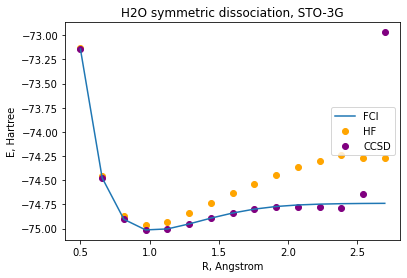

In [12]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## H<sub>4</sub>

converged SCF energy = -0.490349430194863
E = -0.641335842421463 Eh
converged SCF energy = -1.25392999623564
E = -1.4206608962773828 Eh
converged SCF energy = -1.56595801808573
E = -1.7495063386569365 Eh
converged SCF energy = -1.68498777833325
E = -1.8994593810692706 Eh
converged SCF energy = -1.71129034640399
E = -1.9578670493505066 Eh
converged SCF energy = -1.69051863902548
E = -1.9705680764803604 Eh
converged SCF energy = -1.64636314461786
E = -1.9612229842977378 Eh
converged SCF energy = -1.59207429477835
E = -1.9429389599882532 Eh
converged SCF energy = -1.53534452748882
E = -1.9231393794642848 Eh
converged SCF energy = -1.48067023424762
E = -1.9057257762439963 Eh
converged SCF energy = -1.43056954202702
E = -1.892223038877695 Eh
converged SCF energy = -1.38625584606783
E = -1.8826503216484134 Eh
converged SCF energy = -1.34807126605244
E = -1.8762910041644876 Eh
converged SCF energy = -1.31581002744399
E = -1.872257347242544 Eh
converged SCF energy = -1.2889603487334
E = -1.869

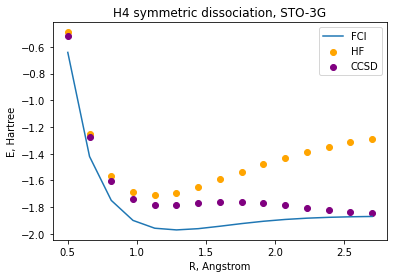

In [13]:
bond_lengths = np.linspace(0.5,2.7,15)

#Run FCI
FCI_PES = obtain_PES('h4', bond_lengths, basis, method='fci')

#Run HF
HF_PES = obtain_PES('h4', bond_lengths, basis,  method='hf')


#Run CCSD
CCSD_PES = obtain_PES('h4', bond_lengths, basis,  method='ccsd')


#Plot H2O PESs

plt.title('H4 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## N<sub>2</sub>

converged SCF energy = -100.573097041036
E = -100.61110406799 Eh
converged SCF energy = -105.049839282597
E = -105.10993765950843 Eh
converged SCF energy = -106.776383879108
E = -106.86439477631563 Eh
converged SCF energy = -107.3730531355
E = -107.4953963734604 Eh
converged SCF energy = -107.50055920472
E = -107.66672237011994 Eh
converged SCF energy = -107.443329077631
E = -107.6633263756012 Eh
converged SCF energy = -107.321862235985
E = -107.60543135286065 Eh
converged SCF energy = -107.184846460802
E = -107.54202861224894 Eh
converged SCF energy = -107.051717252766
E = -107.493227866654 Eh
converged SCF energy = -106.930868701857
E = -107.4641790382084 Eh
converged SCF energy = -106.825762218971
E = -107.45013816013338 Eh
converged SCF energy = -106.736813829634
E = -107.4441006970192 Eh
converged SCF energy = -106.662679574349
E = -107.4414604544912 Eh
converged SCF energy = -106.601415893834
E = -107.44011306579706 Eh
converged SCF energy = -106.551145868711
E = -107.43896388097

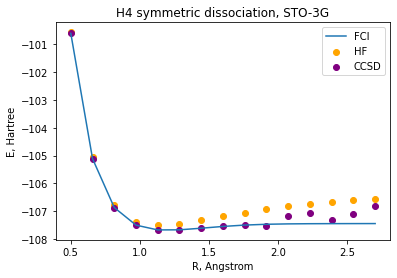

In [14]:
bond_lengths = np.linspace(0.5,2.7,15)

#Run FCI
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')

#Run HF
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')


#Run CCSD
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')


#Plot H2O PESs

plt.title('H4 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()